In [1]:
!source activate py36

In [2]:
!pip install pystan

    100% |████████████████████████████████| 48.0MB 14kB/s  eta 0:00:01
You are using pip version 9.0.3, however version 10.0.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!pip install fbprophet

  Running setup.py bdist_wheel for fbprophet ... done
  Stored in directory: /Users/evan/Library/Caches/pip/wheels/e7/62/5b/94bb082348b1e1f45d3ab97a33982c5aaaefa7f2fecc1d3c89
Successfully built fbprophet
You are using pip version 9.0.3, however version 10.0.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
# Import libraries
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [8]:
# Read in data
df = pd.read_csv('../../../../data/example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [9]:
# Fit a time series model
m = Prophet()
m.fit(df);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/evan/anaconda2/envs/py36/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [10]:
# Predict future time series
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [11]:
# Attach predicted values - yhat
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.209074,7.465259,8.920389
3266,2017-01-16,8.534139,7.824175,9.199398
3267,2017-01-17,8.321541,7.584888,9.053909
3268,2017-01-18,8.154138,7.438546,8.864620
3269,2017-01-19,8.166091,7.405963,8.904572


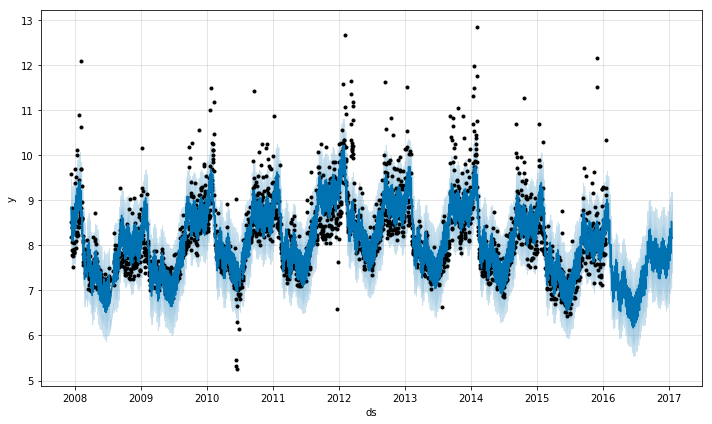

In [12]:
# Plot the forecasted values
from matplotlib import pyplot as plt
%matplotlib inline

m.plot(forecast);

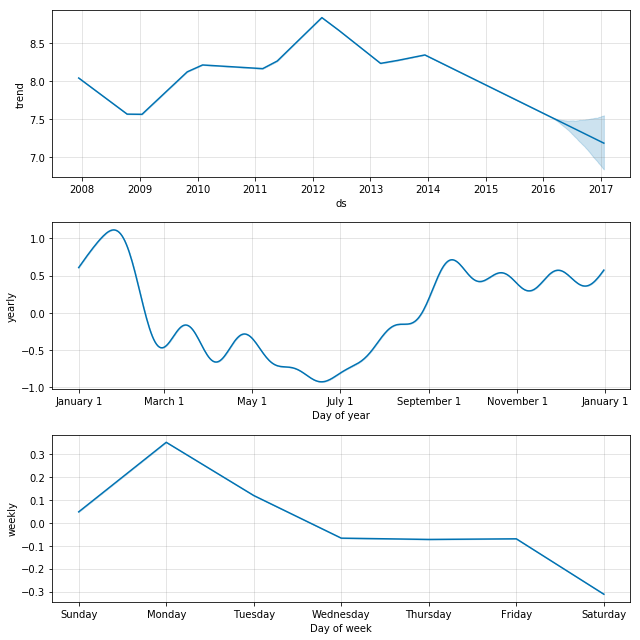

In [13]:
# Time Series Decomposition
m.plot_components(forecast);